# Heart Disease Use Case

# Part 1: Problem Statement

The hospital is having a huge outbreak of patients who have a heart disease and the hospital is finding it hard to test each patient manually and conducting all the necessarry medical investigations required after examining a patient to determine whether the patient is suffering from the heart disease or not. They have approach me as a Data Scientist to try and use their data of patients who were treated by the hospital and find a way to help them to be efficient in determining the heart disease. They already have data where they conduct the tests to see what may be some of the causes that conribute to this disease. They want me to find a way that will minimize the time they take to examine patients who may have this disease and miminize the cost  of the hospital as the tests  cost a lot of money from the health government.

### Objectives and Goals

- To find an easy way to quickly determine if the patient has a heart disease or  not
- To find a way for the doctors to use this product in their mahcine(deployment)
- to provide hight accuracy predictions for doctors.

### Data Gathering 

- The is OCI machine learning Repository
- the data is structured.
- It has label column to determine whether the patient is positive for heart disease or not

# Part 2 : Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = 17,8 
%matplotlib inline

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

### Import Dataset

In [2]:
df = pd.read_csv('dataset/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Exploring the Dataset

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(303, 14)

In [4]:
# Returns an object with all of the column headers
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

### Numerical Analysis

In [8]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

<ipython-input-9-fdfb3b84688d>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



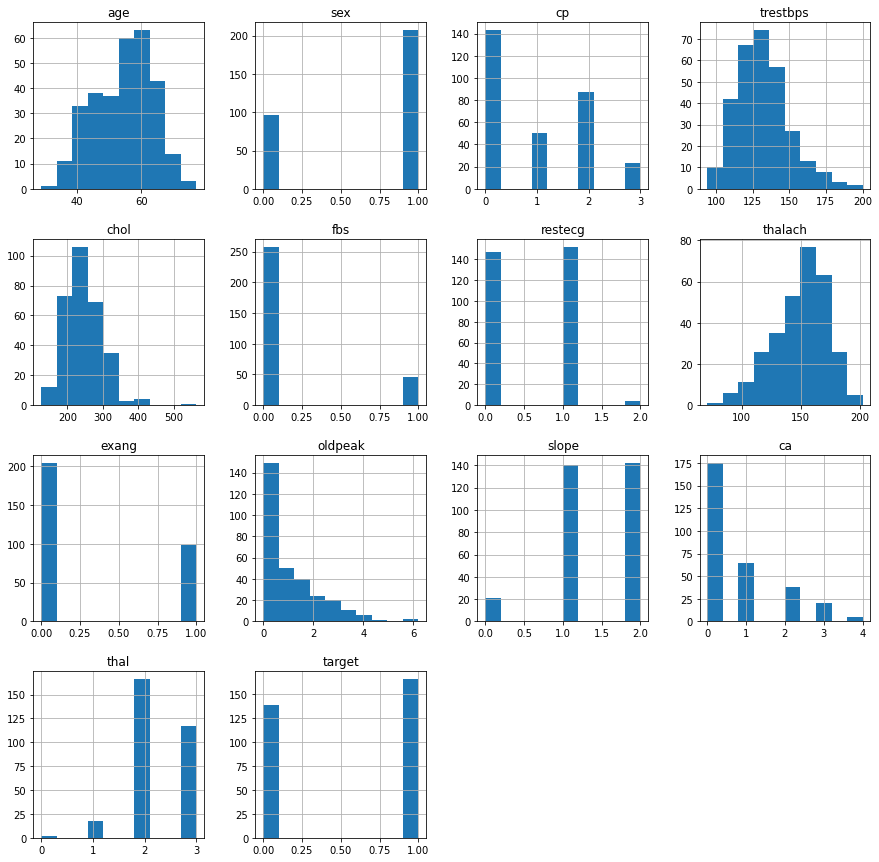

In [9]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

In [10]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [11]:
px.bar(df, x='sex', y='target')

In [12]:
px.bar(df, x='sex', y='chol')

<AxesSubplot:xlabel='sex', ylabel='age'>

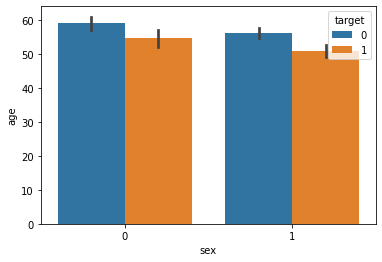

In [13]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cp', ylabel='target'>

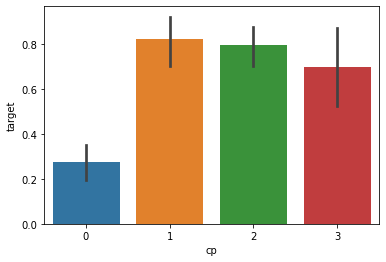

In [14]:
sns.barplot(df["cp"],df['target'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='target'>

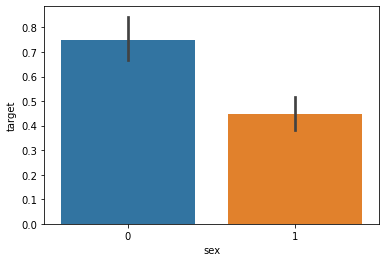

In [15]:
sns.barplot(df["sex"],df['target'])

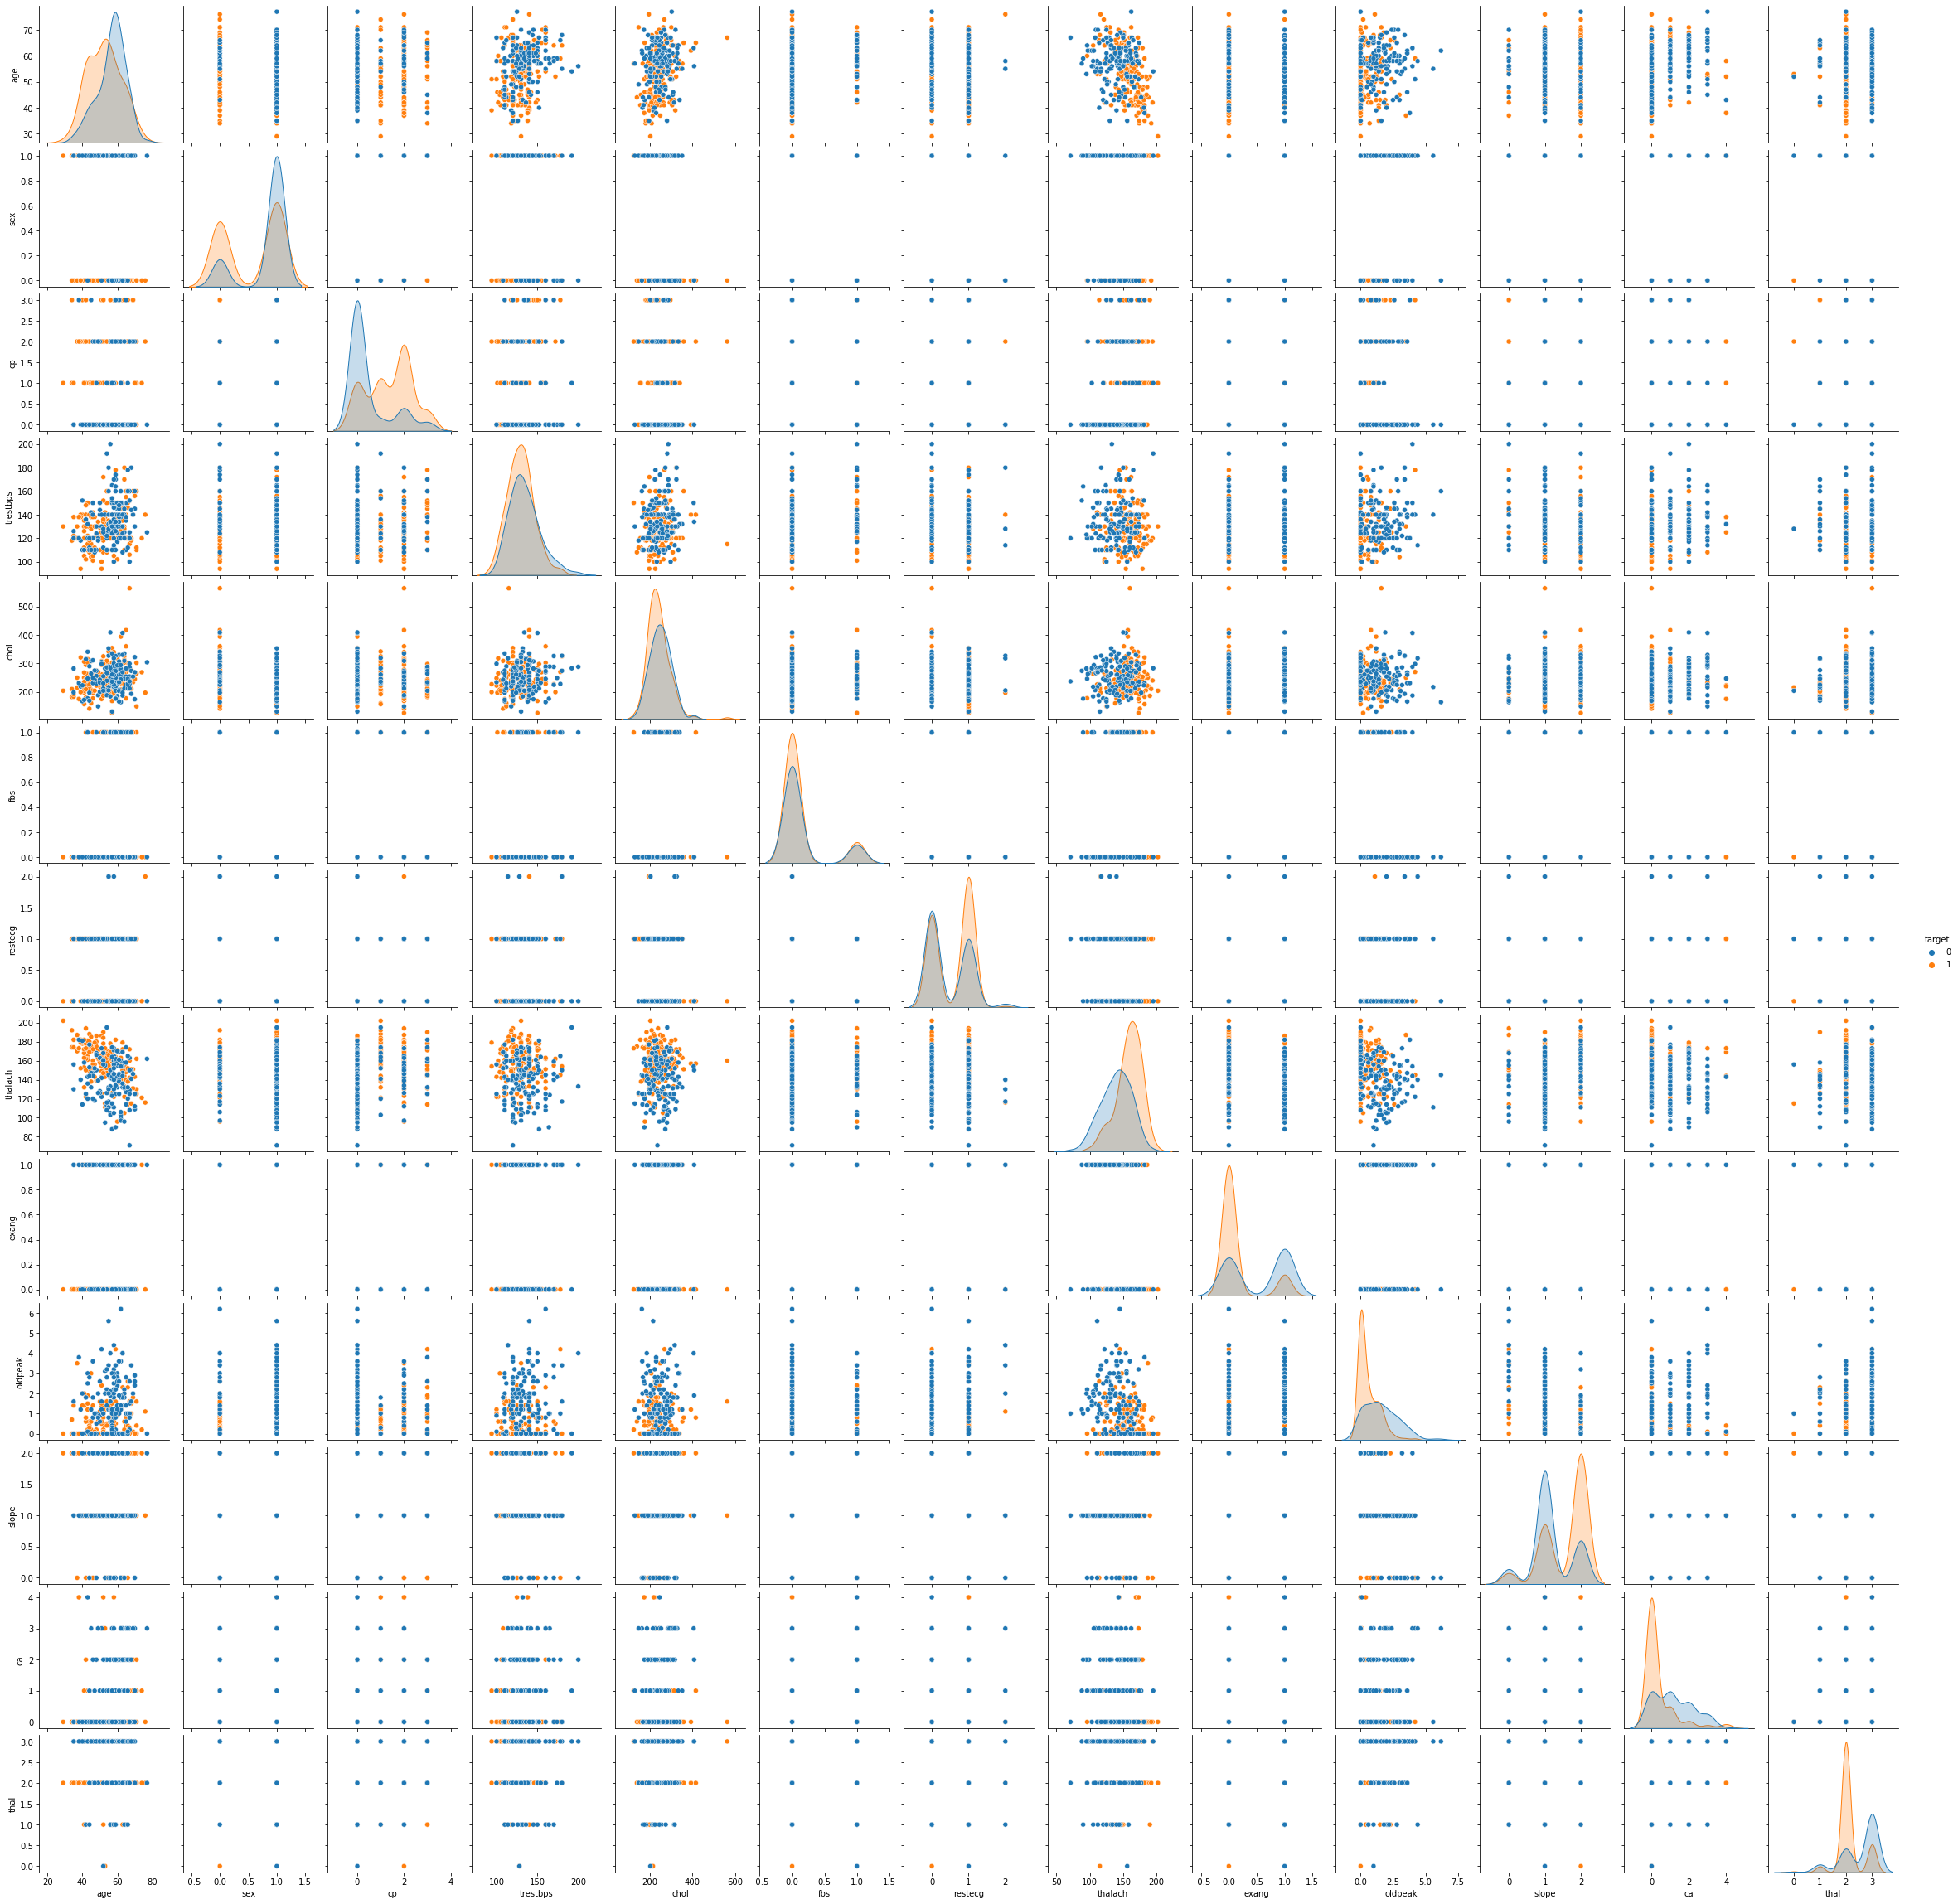

In [16]:
sns.pairplot(df,hue='target')

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\C

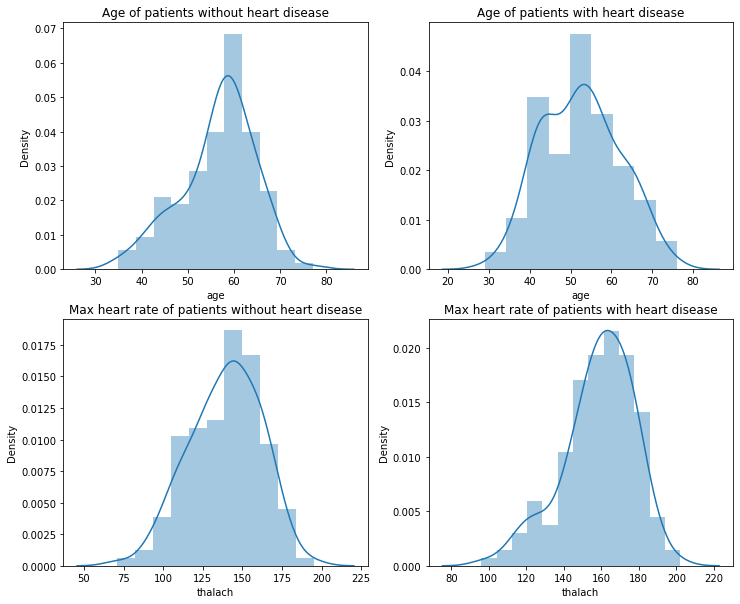

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Categorical Analysis

In [19]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Text(0.5, 1.0, 'Age by Passenger Thal')

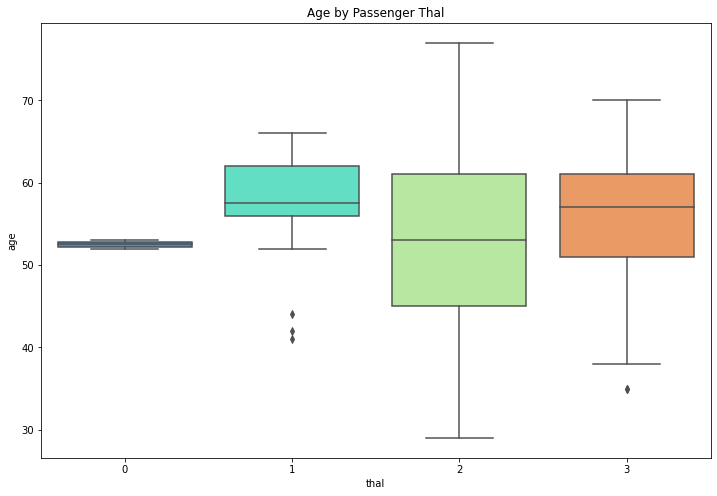

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='thal',y='age',data=df, palette='rainbow')
plt.title("Age by Passenger Thal")

In [21]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Text(0.5, 1.0, 'Age by Passenger ca')

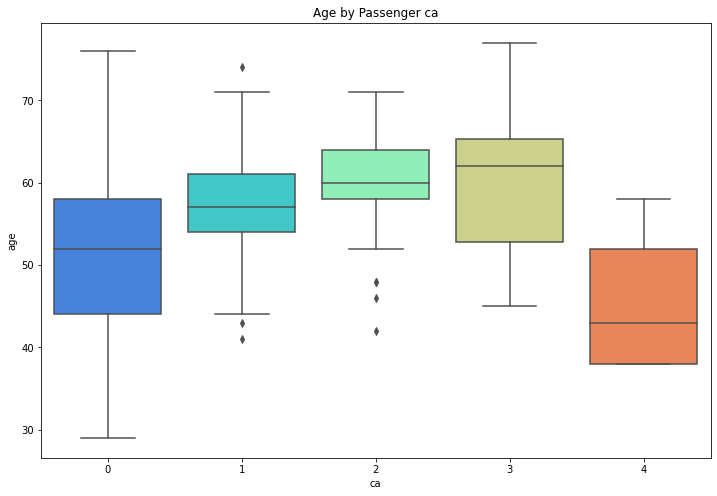

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='ca',y='age',data=df, palette='rainbow')
plt.title("Age by Passenger ca")

In [23]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

Text(0.5, 1.0, 'Age by Passenger exang')

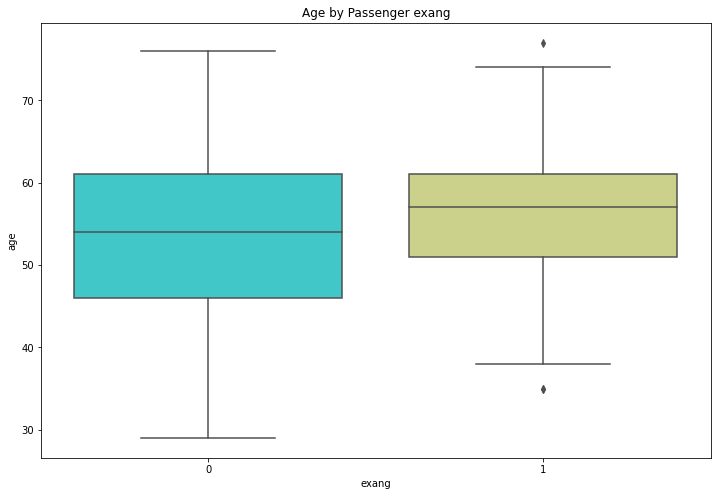

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='exang',y='age',data=df, palette='rainbow')
plt.title("Age by Passenger exang")

Text(0.5, 1.0, 'Violin Plot of Age by Exang, Separated by Sex')

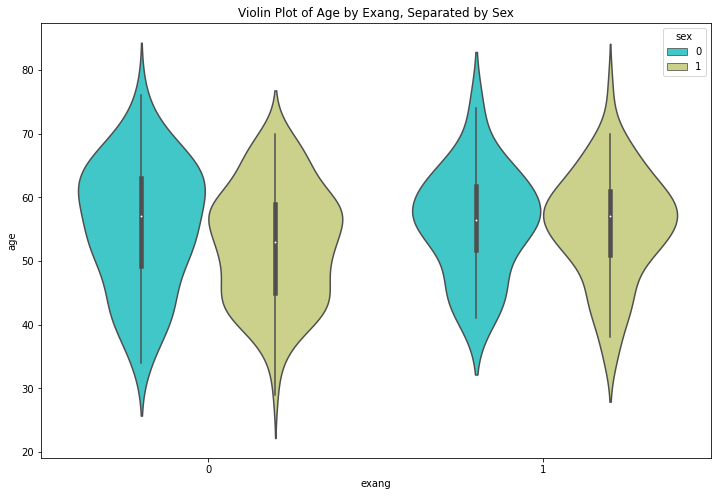

In [25]:
plt.figure(figsize=(12,8))
sns.violinplot(x='exang',y="age",data=df, hue='sex', palette='rainbow')
plt.title("Violin Plot of Age by Exang, Separated by Sex")

In [26]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

Text(0.5, 1.0, 'Distribution of Age by Passenger fbs')

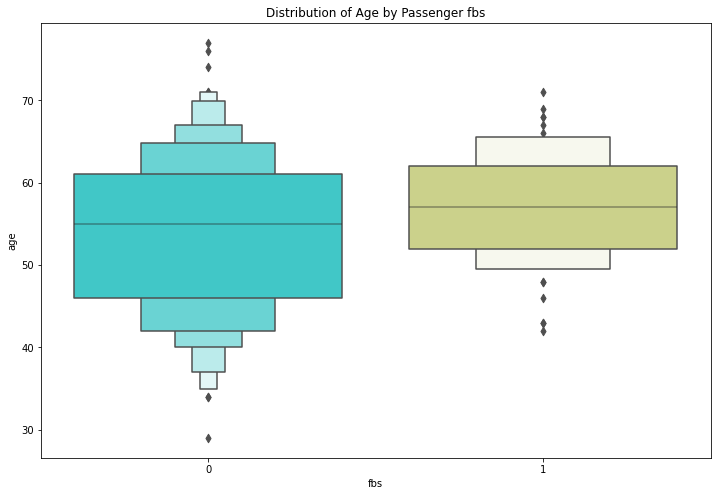

In [27]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='fbs', y='age', data=df, palette='rainbow')
plt.title("Distribution of Age by Passenger fbs")

### Findings And Comments

# Part 3 : Data Pre-processing

### Missing Values

In [28]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Outliers

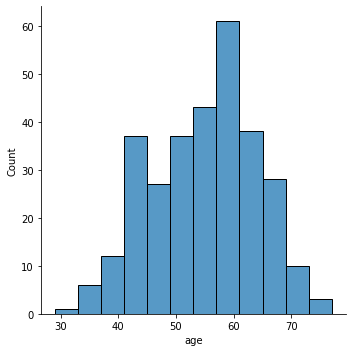

In [31]:
# distribution plot for the column to check distribution of hours
sns.displot(df['age'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

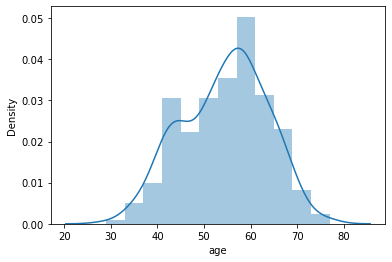

In [32]:
# checking the box plot for outliers
sns.distplot(df['age'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

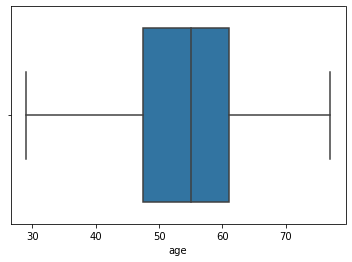

In [33]:
# checking the box plot for outliers
sns.boxplot(df['age'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='sex', ylabel='Density'>

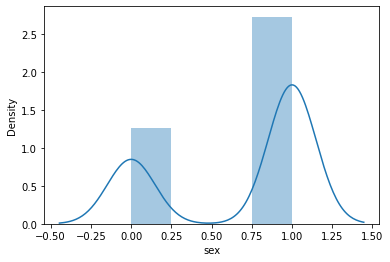

In [34]:
# checking the box plot for outliers
sns.distplot(df['sex'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex'>

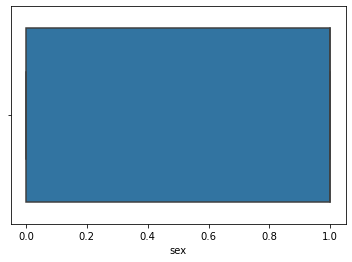

In [35]:
# checking the box plot for outliers
sns.boxplot(df['sex'])

In [36]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cp', ylabel='Density'>

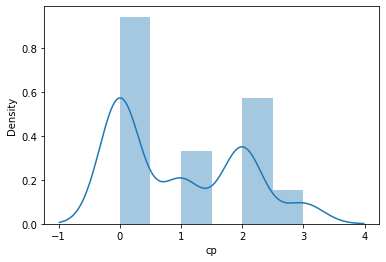

In [37]:
# checking the box plot for outliers
sns.distplot(df['cp'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cp'>

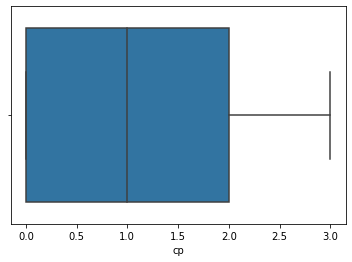

In [38]:
# checking the box plot for outliers
sns.boxplot(df['cp'])

### Detecting Outliers in trestbps column and removing them

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='trestbps', ylabel='Density'>

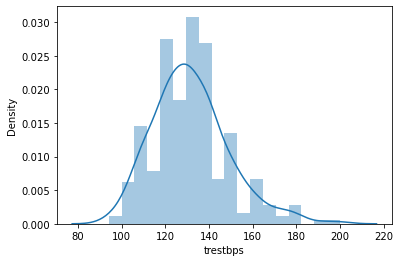

In [39]:
# checking the box plot for outliers
sns.distplot(df['trestbps'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='trestbps'>

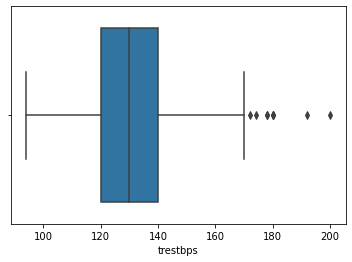

In [40]:
# checking the box plot for outliers
sns.boxplot(df['trestbps'])

In [41]:
# removee the outliers
def remove_hrs_per_week_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['trestbps'].quantile(0.25)
    Q3 = df['trestbps'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['trestbps'] <= LL, 'trestbps'] = LL
    # do the same for values greater than the UL
    df.loc[df['trestbps'] >= UL, 'trestbps'] = UL

In [42]:
remove_hrs_per_week_outliers(df)

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='trestbps'>

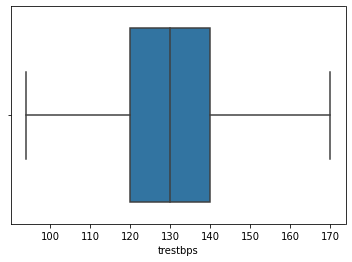

In [43]:
# checking the box plot for outliers AFRER
sns.boxplot(df['trestbps'])

In [44]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145.0   233    1        0      150      0      2.3      0   
1   37    1   2     130.0   250    0        1      187      0      3.5      0   
2   41    0   1     130.0   204    0        0      172      0      1.4      2   
3   56    1   1     120.0   236    0        1      178      0      0.8      2   
4   57    0   0     120.0   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Detecting outliers in chol column and removing them

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='chol', ylabel='Density'>

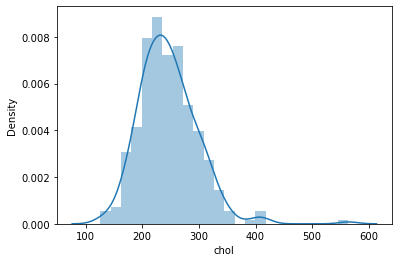

In [45]:
# checking the box plot for outliers
sns.distplot(df['chol'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='chol'>

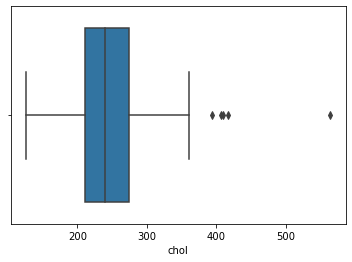

In [46]:
# checking the box plot for outliers
sns.boxplot(df['chol'])

In [47]:
# removee the outliers
def remove_chol_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['chol'].quantile(0.25)
    Q3 = df['chol'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['chol'] <= LL, 'chol'] = LL
    # do the same for values greater than the UL
    df.loc[df['chol'] >= UL, 'chol'] = UL

In [48]:
remove_chol_outliers(df)

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='chol'>

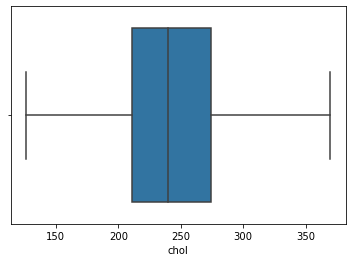

In [49]:
# checking the box plot for outliers AFRER
sns.boxplot(df['chol'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='chol', ylabel='Density'>

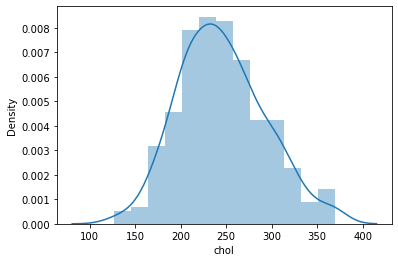

In [50]:
# checking the box plot for outliers AFTER
sns.distplot(df['chol'])

In [51]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0      150      0      2.3   
1   37    1   2     130.0  250.0    0        1      187      0      3.5   
2   41    0   1     130.0  204.0    0        0      172      0      1.4   
3   56    1   1     120.0  236.0    0        1      178      0      0.8   
4   57    0   0     120.0  354.0    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

### Detecting outliers in thalach column and removing them

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='thalach', ylabel='Density'>

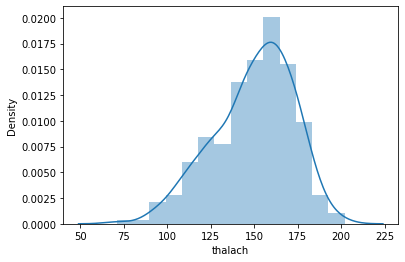

In [52]:
# checking the box plot for outliers 
sns.distplot(df['thalach'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='thalach'>

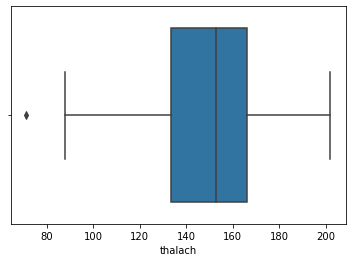

In [53]:
# checking the box plot for outliers 
sns.boxplot(df['thalach'])

In [54]:
# removee the outliers
def remove_thalach_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['thalach'].quantile(0.25)
    Q3 = df['thalach'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['thalach'] <= LL, 'thalach'] = LL
    # do the same for values greater than the UL
    df.loc[df['thalach'] >= UL, 'thalach'] = UL

In [55]:
remove_thalach_outliers(df)

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='thalach', ylabel='Density'>

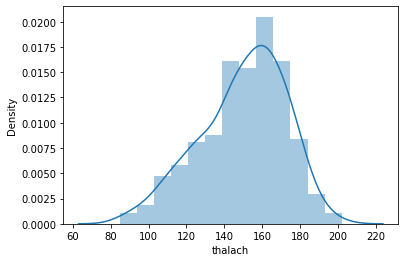

In [56]:
# checking the box plot for outliers AFTER
sns.distplot(df['thalach'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='thalach'>

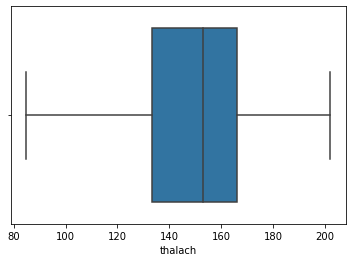

In [57]:
# checking the box plot for outliers AFTER
sns.boxplot(df['thalach'])

### Detecting outliers in OLDPEAK column and removing them

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

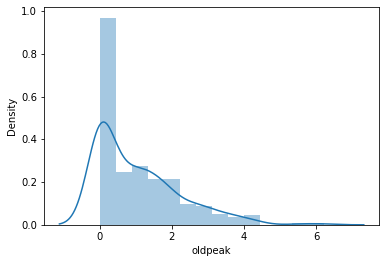

In [58]:
# checking the box plot for outliers 
sns.distplot(df['oldpeak'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='oldpeak'>

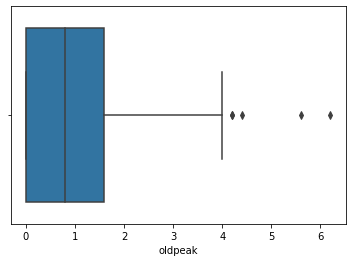

In [59]:
# checking the box plot for outliers 
sns.boxplot(df['oldpeak'])

In [60]:
# removee the outliers
def remove_oldpeak_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['oldpeak'].quantile(0.25)
    Q3 = df['oldpeak'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['oldpeak'] <= LL, 'oldpeak'] = LL
    # do the same for values greater than the UL
    df.loc[df['oldpeak'] >= UL, 'oldpeak'] = UL

In [61]:
remove_oldpeak_outliers(df)

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

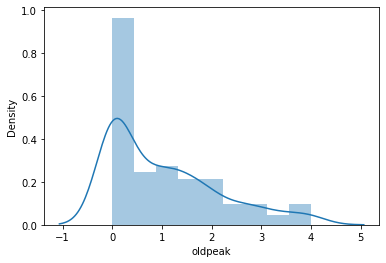

In [62]:
# checking the box plot for outliers AFRER
sns.distplot(df['oldpeak'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='oldpeak'>

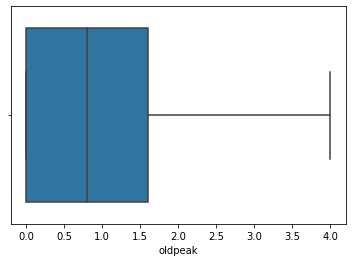

In [63]:
# checking the box plot for outliers AFTER
sns.boxplot(df['oldpeak'])

In [64]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0     120.0  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [65]:
df_new = df.copy()

In [66]:
df_new.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0     120.0  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

# Part 4 : Feature Engineering

### Categorical Encoding

Since the data has already some of its categorical columns in  binary form that will lead to the algorithmns thinking that the binary values in those categorical columns are ordinal. For example: the sex column has 1 for male and 0 for female originally, by allowing the dataset to go on like that to the algorithmn  it will mislead athe algorithm in thinking that the values in that column are ordinal, hence we will engineer the categorical columns by using getDummies function so the algorithm is not misled.

In [67]:
df_new = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [68]:
df_new.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [69]:
df_new.head()

age  trestbps   chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0   63     145.0  233.0    150.0      2.3       1      0      1     0     0   
1   37     130.0  250.0    187.0      3.5       1      0      1     0     0   
2   41     130.0  204.0    172.0      1.4       1      1      0     0     1   
3   56     120.0  236.0    178.0      0.8       1      0      1     0     1   
4   57     120.0  354.0    163.0      0.6       1      1      0     1     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]

### Column Transformation

# Part 5 : Feature Selection

### Seperate into Features and Target

In [70]:
X = df_new.drop('target', axis=1)
y = df_new['target']

In [71]:
print(X)

     age  trestbps   chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0     63     145.0  233.0    150.0      2.3      0      1     0     0     0   
1     37     130.0  250.0    187.0      3.5      0      1     0     0     1   
2     41     130.0  204.0    172.0      1.4      1      0     0     1     0   
3     56     120.0  236.0    178.0      0.8      0      1     0     1     0   
4     57     120.0  354.0    163.0      0.6      1      0     1     0     0   
..   ...       ...    ...      ...      ...    ...    ...   ...   ...   ...   
298   57     140.0  241.0    123.0      0.2      1      0     1     0     0   
299   45     110.0  264.0    132.0      1.2      0      1     0     0     0   
300   68     144.0  193.0    141.0      3.4      0      1     1     0     0   
301   57     130.0  131.0    115.0      1.2      0      1     1     0     0   
302   57     130.0  236.0    174.0      0.0      1      0     0     1     0   

     ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  th

In [72]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [73]:
X

age  trestbps   chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0     63     145.0  233.0    150.0      2.3      0      1     0     0     0   
1     37     130.0  250.0    187.0      3.5      0      1     0     0     1   
2     41     130.0  204.0    172.0      1.4      1      0     0     1     0   
3     56     120.0  236.0    178.0      0.8      0      1     0     1     0   
4     57     120.0  354.0    163.0      0.6      1      0     1     0     0   
..   ...       ...    ...      ...      ...    ...    ...   ...   ...   ...   
298   57     140.0  241.0    123.0      0.2      1      0     1     0     0   
299   45     110.0  264.0    132.0      1.2      0      1     0     0     0   
300   68     144.0  193.0    141.0      3.4      0      1     1     0     0   
301   57     130.0  131.0    115.0      1.2      0      1     1     0     0   
302   57     130.0  236.0    174.0      0.0      1      0     0     1     0   

     ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  \
0    ...        0     1     0     0     0     0       0       1       0   
1    ...        0     1     0     0     0     0       0       0       1   
2    ...        1     1     0     0     0     0       0       0       1   
3    ...        1     1     0     0     0     0       0       0       1   
4    ...        1     1     0     0     0     0       0       0       1   
..   ...      ...   ...   ...   ...   ...   ...     ...     ...     ...   
298  ...        0     1     0     0     0     0       0       0       0   
299  ...        0     1     0     0     0     0       0       0       0   
300  ...        0     0     0     1     0     0       0       0       0   
301  ...        0     0     1     0     0     0       0       0       0   
302  ...        0     0     1     0     0     0       0       0       1   

     thal_3  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
298       1  
299       1  
300       1  
301       1  
302       0  

[303 rows x 30 columns]

In [74]:
#X = X[['age','sex','cp','trestbps','chol','thalach','oldpeak','fbs','restecg','exang','slope','ca','thal']]

In [75]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

### Feature Selection

<AxesSubplot:>

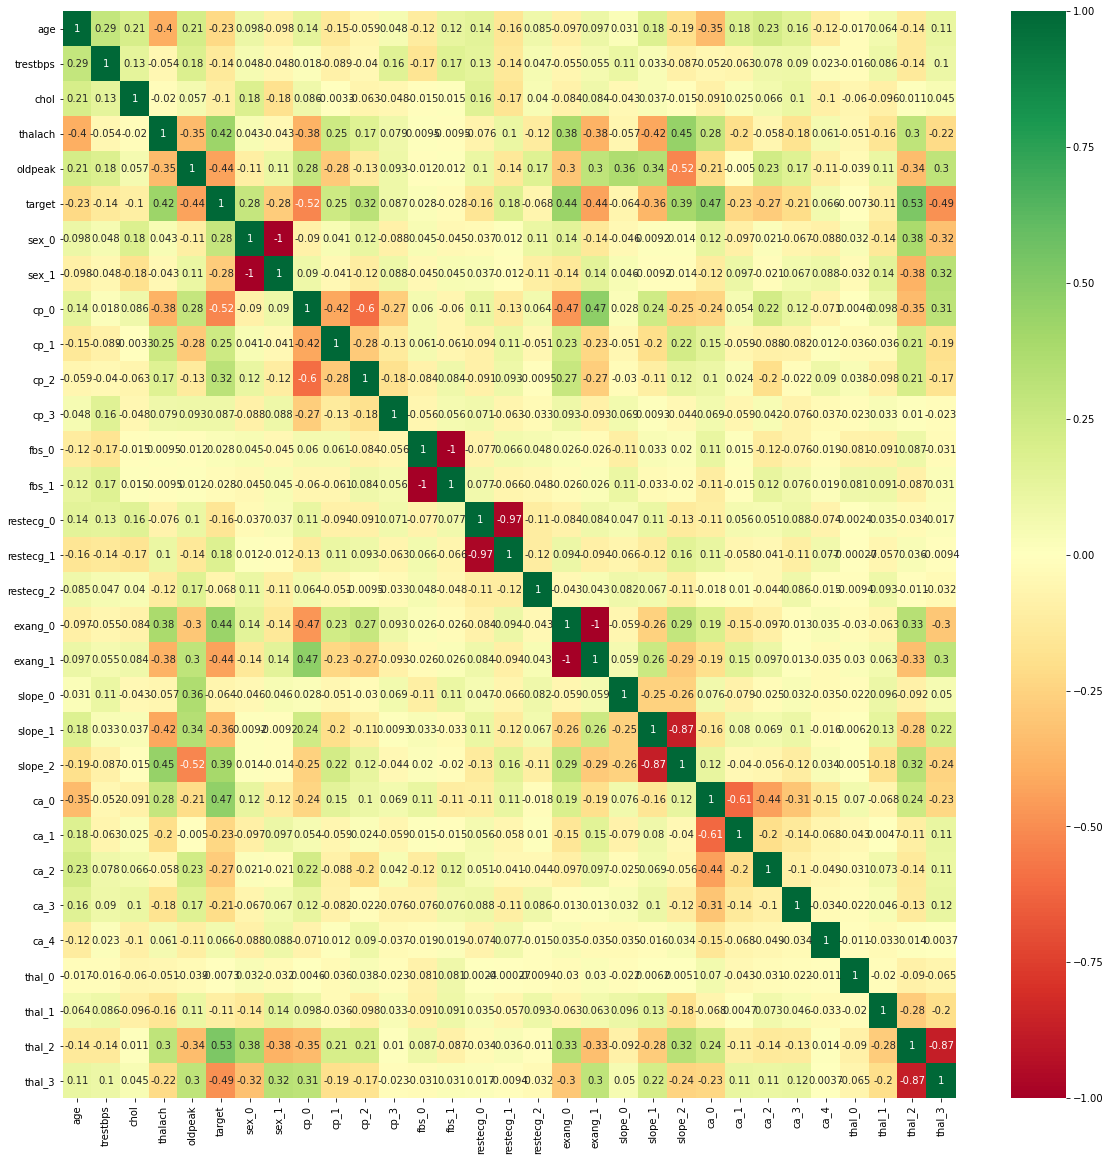

In [76]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df_new.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df_new[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [77]:
#!pip install feature_engine

In [81]:
# select the best k features that are have an impact in the data and are very important
from sklearn.feature_selection import SelectKBest
X_new = SelectKBest(k=10).fit_transform(X, y)
X_new.shape

(303, 10)

### Split dataset into Training and Testing Datasets

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [83]:
X_train

array([[1.62e+02, 0.00e+00, 0.00e+00, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       [1.11e+02, 8.00e-01, 1.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.47e+02, 3.60e+00, 0.00e+00, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [1.31e+02, 1.00e-01, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.44e+02, 8.00e-01, 1.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.79e+02, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [84]:
X_test

array([[1.120e+02, 6.000e-01, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.590e+02, 2.000e-01, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
       [1.730e+02, 2.000e-01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.500e+02, 1.900e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.300e+02, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [1.740e+02, 1.600e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.520e+02, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.330e+02, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:2] = sc.fit_transform(X_train[:, 0:2])
X_test[:, 0:2] = sc.transform(X_test[:, 0:2])

In [86]:
X_train

array([[ 0.53278078, -0.93845816,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.75358236, -0.19078121,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.13967897,  2.42608813,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.85696936, -0.84499854,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.27417092, -0.19078121,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.29490183, -0.93845816,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [87]:
y_train.shape , X_train.shape

((242,), (242, 10))

### Imbalance Dataset

In [88]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

- The data seems balanced.

### Dimensionality Reduction

In [89]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 8)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [90]:
X_train.shape, X_test.shape

((242, 10), (61, 10))

# Part 6 : Model Building

### Train Model

I will be experimenting with 3 Algorithms:

1. K- Nearest Neighbours
2. Decision Tree Classifier
3. Random Forest Tree Classifier

## K - Nearest Neighbours Classifier Model

In [91]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
# importing the cross validatioin library for checking when and how well it will perform after some twerks
from sklearn.model_selection import cross_val_score

In [92]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
# going through the range of 20, and determining the scores of the model of each i and keeping the score with its associated i
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
# getting the scores and their validation
  cvs_scores = cross_val_score(knn_classifier, X_new, y, cv=10)
    # apppend the average of the scores in a list and round them to 3 decimal places
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

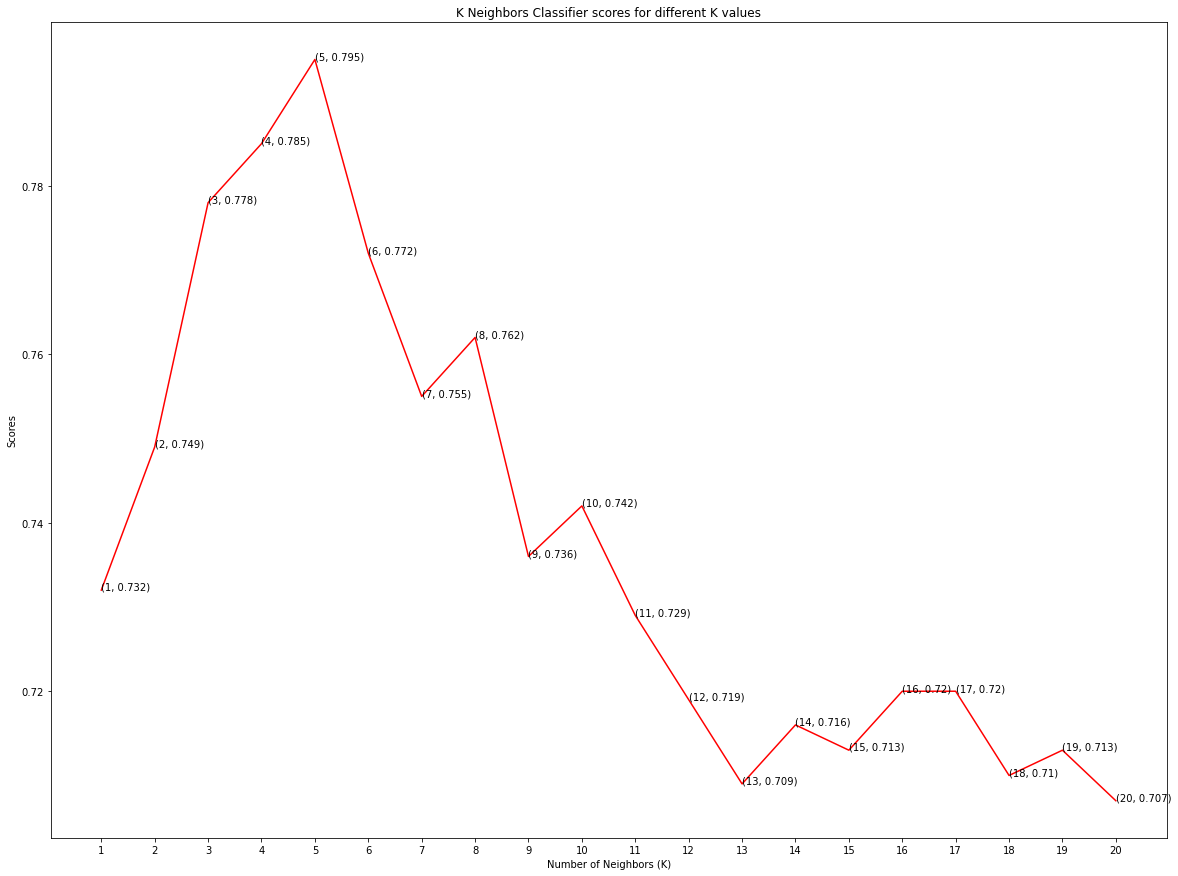

In [93]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
# creating a line graph that will have i values along the x-axes and the cross validation scores along the y-axes, all that in red
# colour
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
# to add the text in each i value and its associated score in the line graph
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [95]:
# Training the knn classifier model with k value as 5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
cvs_scores = cross_val_score(knn_classifier, X_new, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 79.53%


## Decision Tree Classifier

In [96]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [98]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X_new, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

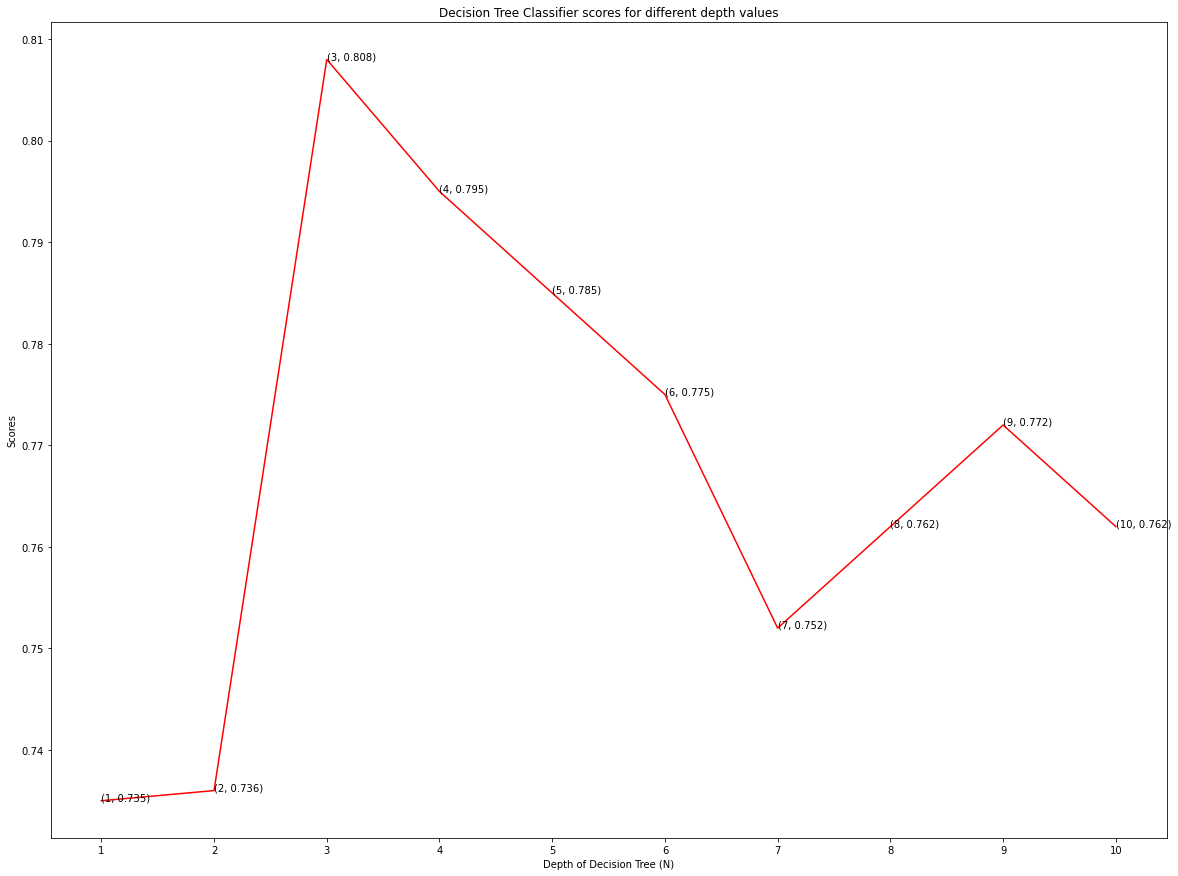

In [99]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [100]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X_new, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 80.83%


## Random Forest Classifier

In [101]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X_new, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

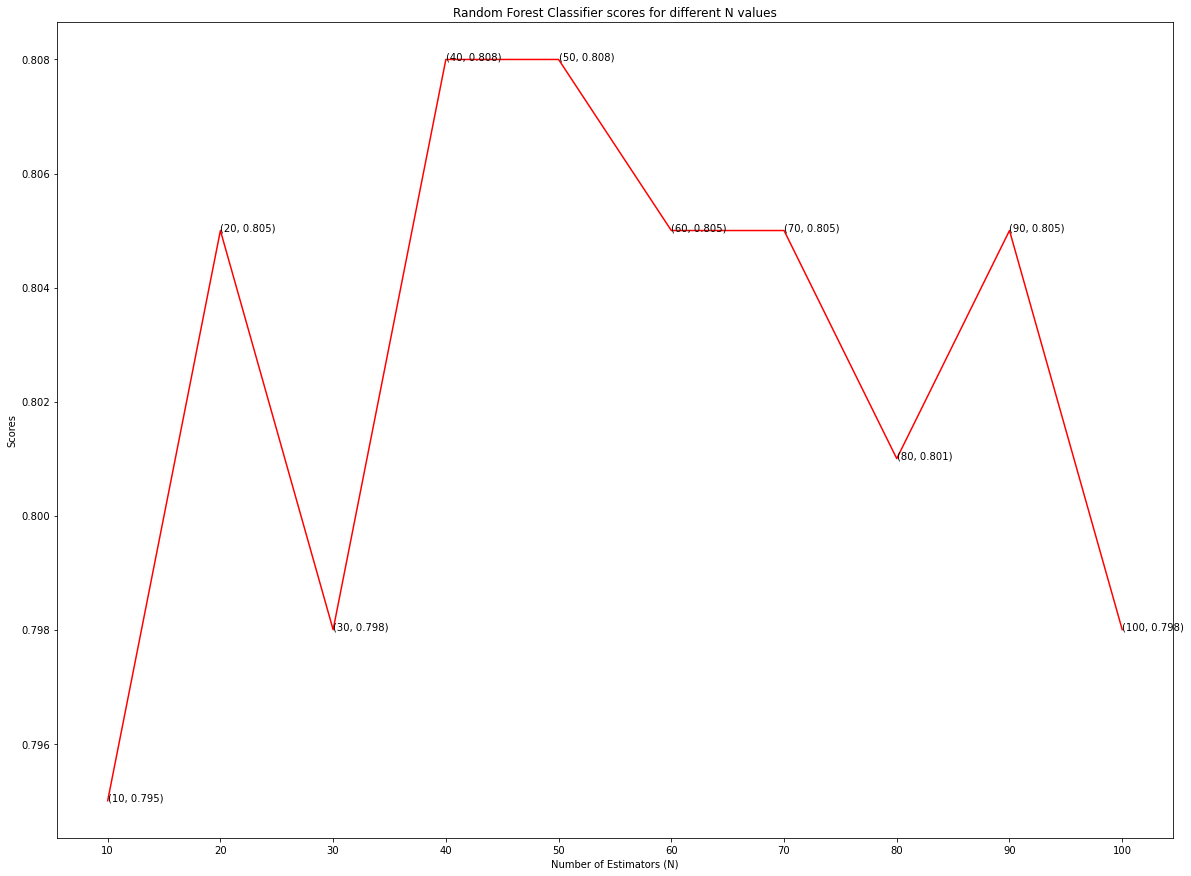

In [103]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [104]:
# Training the random forest classifier model with n value as 50
forest_classifier = RandomForestClassifier(n_estimators=50)
cvs_scores = cross_val_score(forest_classifier, X_new, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 80.49%
